<a href="https://colab.research.google.com/github/sanjayi2000/NLP/blob/main/SanjayR_552_CIAII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
df = df = pd.read_csv("C:/Users/sanja/OneDrive/Documents/NLP/spam.csv", encoding='latin1')
X = df['v2']
y = df['v1']

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['ham', 'spam'])
    ax.yaxis.set_ticklabels(['ham', 'spam'])
    plt.show()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

In [ ]:
y=y.map({'ham':0,'spam':1})

Splitting the dataset into Train and test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Building the RNN model

In [ ]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32))
model_rnn.add(LSTM(64))
model_rnn.add(Dense(1, activation='sigmoid'))

In [ ]:
model_rnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5


70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 306ms/step - accuracy: 0.8412 - loss: 0.4256 - val_accuracy: 0.9713 - val_loss: 0.1319
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 203ms/step - accuracy: 0.9813 - loss: 0.0781 - val_accuracy: 0.9776 - val_loss: 0.0762
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 365ms/step - accuracy: 0.9907 - loss: 0.0339 - val_accuracy: 0.9830 - val_loss: 0.0612
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 39s 541ms/step - accuracy: 0.9962 - loss: 0.0152 - val_accuracy: 0.9839 - val_loss: 0.0582
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 37s 538ms/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9839 - val_loss: 0.0515


In [ ]:
loss,accuracy=model_rnn.evaluate(X_test,y_test)
print(f"Test Accuracy of the RNN Model is:{accuracy}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9862 - loss: 0.0470
Test Accuracy of the RNN Model is:0.9838564991950989


35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step


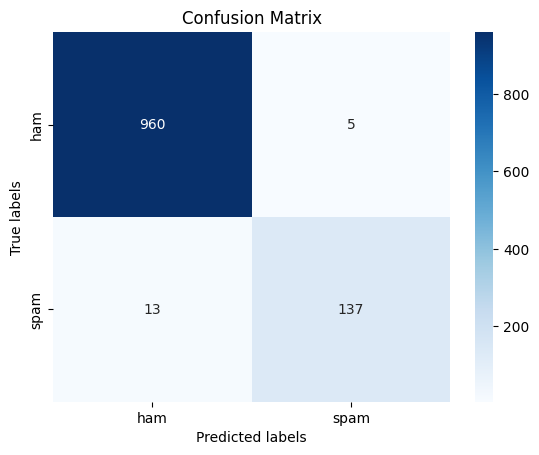

In [ ]:
plot_confusion_matrix(model_rnn, X_test, y_test)

Building the LSTM model

In [ ]:
model_lstm=Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1, activation='sigmoid'))

In [ ]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_lstm.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=5, batch_size=64)

Epoch 1/5


70/70 ━━━━━━━━━━━━━━━━━━━━ 68s 578ms/step - accuracy: 0.8791 - loss: 0.4079 - val_accuracy: 0.9731 - val_loss: 0.1225
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 46s 635ms/step - accuracy: 0.9789 - loss: 0.0894 - val_accuracy: 0.9821 - val_loss: 0.0691
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 576ms/step - accuracy: 0.9915 - loss: 0.0336 - val_accuracy: 0.9812 - val_loss: 0.0633
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 602ms/step - accuracy: 0.9962 - loss: 0.0164 - val_accuracy: 0.9839 - val_loss: 0.0573
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 38s 540ms/step - accuracy: 0.9980 - loss: 0.0087 - val_accuracy: 0.9848 - val_loss: 0.0548


In [ ]:
loss,accuracy=model_lstm.evaluate(X_test,y_test)
print(f"Test accuracy of the LSTM Model: {accuracy}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - accuracy: 0.9888 - loss: 0.0465
Test accuracy of the LSTM Model: 0.9847533702850342


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step


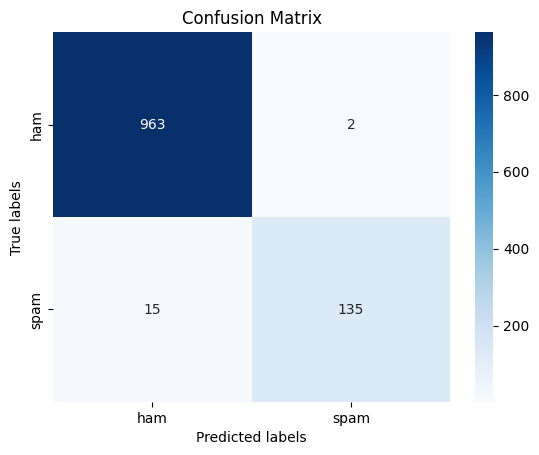

In [ ]:
plot_confusion_matrix(model_lstm, X_test, y_test)